# A Quick Machine Learning Modelling Tutorial with Python and Scikit-Learn (sklearn)


## TODO - What is Scikit-Learn (sklearn)?

[NumPy](https://docs.scipy.org/doc/numpy/index.html) stands for numerical Python. It's the backbone of all kinds of scientific and numerical computing in Python.

And since machine learning is all about turning data into numbers and then figuring out the patterns, NumPy often comes into play.

<img src="images/6-step-ml-framework-tools-numpy-highlight.png" alt="a 6 step machine learning framework along will tools you can use for each step" width="700"/>

## TODO - Why Scikit-Learn?

You can do numerical calculations using pure Python. In the beginning, you might think Python is fast but once your data gets large, you'll start to notice slow downs.

One of the main reasons you use NumPy is because it's fast. Behind the scenes, the code has been optimized to run using C. Which is another programming language, which can do things much faster than Python.

The benefit of this being behind the scenes is you don't need to know any C to take advantage of it. You can write your numerical computations in Python using NumPy and get the added speed benefits.

If your curious as to what causes this speed benefit, it's a process called vectorization. [Vectorization](https://en.wikipedia.org/wiki/Vectorization) aims to do calculations by avoiding loops as loops can create potential bottlenecks.

NumPy achieves vectorization through a process called [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#module-numpy.doc.broadcasting).


## TODO - What does this notebook cover?

The NumPy library is very capable. However, learning everything off by heart isn't necessary. Instead, this notebook focuses on the main concepts of NumPy and the `ndarray` datatype.

You can think of the `ndarray` datatype as a very flexible array of numbers.

More specifically, we'll look at:
* NumPy datatypes & attributes
* Creating arrays
* Viewing arrays & matrices (indexing)
* Manipulating & comparing arrays
* Sorting arrays
* Use cases (examples of turning things into numbers)

After going through it, you'll have the base knolwedge of NumPy you need to keep moving forward.

## TODO - Where can I get help?
If you get stuck or think of something you'd like to do which this notebook doesn't cover, don't fear!

The recommended steps you take are:
1. **Try it** - Since NumPy is very friendly, your first step should be to use what you know and try figure out the answer to your own question (getting it wrong is part of the process). If in doubt, run your code.
2. **Search for it** - If trying it on your own doesn't work, since someone else has probably tried to do something similar, try searching for your problem. You'll likely end up in 1 of 2 places:
    * [NumPy documentation](https://docs.scipy.org/doc/numpy/index.html) - the ground truth for everything NumPy, this resource covers all of the NumPy functionality.
    * [Stack Overflow](https://stackoverflow.com/) - this is the developers Q&A hub, it's full of questions and answers of different problems across a wide range of software development topics and chances are, there's one related to your problem.
    
An example of searching for a NumPy function might be:

> "how to find unique elements in a numpy array"

Searching this on Google leads to the NumPy documentation for the `np.uniquie()` function: https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

The next steps here are to read through the documentation, check the examples and see if they line up to the problem you're trying to solve. If they do, **rewrite the code** to suit your needs, run it, and see what the outcomes are.

3. **Ask for help** - If you've been through the above 2 steps and you're still stuck, you might want to ask your question on [Stack Overflow](https://www.stackoverflow.com). Be as specific as possible and provide details on what you've tried.

Remember, you don't have to learn all of the functions off by heart to begin with. 

What's most important is continually asking yourself, "what am I trying to do with the data?".

Start by answering that question and then practicing finding the code which does it.

Let's get started.

## Topics to cover

* Focus on a few topics which a student can use to get started
* Concepts should be covered which are covered in the heart disease project
* An Scikit-Learn/sklearn workflow is paramount, start with that and work backwards 

Concepts to go over before the code:
* Getting data ready (splitting into train and test sets)
* Choosing the algorithm (called estimator, model... etc)
* Choosing the hyperparameters (knobs you can turn on your model)
* Fitting the model to the data (easy to do if your data is ready)
* Evaluating the model (different problems have different metrics)
* Use the model to make predictions on the future (unseen data)
* Experimentation
    * Trying different models
    * Trying different hyperparameters
    * Getting more data

* Things to watch out for:
    * High-bias models: underfits the data
    * High-variance models: overfits the data
    * A model will never, except by chance, give a better score to the validation set than the training set
    

In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 0. An end-to-end Scikit-Learn workflow

Show a student what it looks like going through the heart disease dataset and building a machine learning model to classify whether a patient has heart disease and then use the model to predict whether a new patient has heart disease or not (could use my own data for this).

Take the heart disease dataset, split it, fit a model, check out the model, introduce these with the steps:

1. Get data ready (`train_test_split()`, `X`, `y`)
2. Choose a model (Scikit-Learn estimator cheatsheet - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) 
3. Choose the hyperparameters (different for each model)
4. Fit the model
5. Evaluate the model
6. Use the model to make a prediction
    * Step 5 & 6 are similar because to evaluate the model we'll be making predictions with it 
7. Experiment to improve 
8. Save model for use elsewhere

Once students have seen an end-to-end workflow, work backwards through each step.

Put all of these steps into a pipeline.

### Random Forest Classifier Workflow for Classifying Heart Disease

#### 1. Get the data ready

We'll import the `heart-disease.csv` file we've been working with to create a scikit-learn workflow.

In [2]:
import pandas as pd
heart_disease = pd.read_csv('../data/heart-disease.csv')

# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

In [3]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64, 1    165
 0    138
 Name: target, dtype: int64)

In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

#### 2. Choose the model
This is often referred to as `model` or `clf` (short for classifier) or estimator (as in the Scikit-Learn) documentation.

In [6]:
# We'll use a Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#### 3. Choose the hyperparameters
Hyperparameters are like knobs on an oven you can tune to cook your favourite dish.

In [7]:
# We'll leave as default to begin with...
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 4. Fit the model to the data
Fitting the model on the data involves passing it the data and asking it to figure out the patterns. 

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels. 

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [8]:
model.fit(X_train, y_train)

/Users/daniel/Desktop/ml-course/work-in-progress/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 5. Evaluate the model

Each model or estimator has a built-in score method. This method compares how well the model was able to learn the patterns between the features and labels. In other words, it returns how accurate your model is.

In [9]:
# Evaluate the model on the training set
model.score(X_train, y_train)

0.9823788546255506

In [10]:
# Evaluate the model on the test set
model.score(X_test, y_test)

0.8421052631578947

#### 6. Use the model to make a prediction

The whole point of training a machine learning model is to use it to make some kind of prediction in the future.

Once our model instance is trained, you can use the `predict()` method to predict a target value given a set of features. In other words, use the model, along with some unlabelled data to predict the label. 

Note, data you predict on has to be in the same shape as data you trained on.

In [11]:
# This doesn't work... incorrect shapes
y_label = model.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
# In order to predict a label, data has to be in the same shape as X_train
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3


In [13]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = model.predict(X_test)

Now we've made some predictions, we can start to use some more scikit-learn methods to figure out how good our model is. 

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.80      0.85      0.82        33

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [15]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[36,  7],
       [ 5, 28]])

In [16]:
accuracy_score(y_test, y_preds)

0.8421052631578947

#### 7. Experiment to improve

The first model you build is often referred to as a baseline.

Once you've got a baseline model, like we have here, it's important to remember, this is often not the final model you'll use.

The next step in the workflow is to try and improve upon your baseline model.

And to do this, there's two ways to look at it. From a model perspective and from a data perspective.

From a model perspective this may involve things such as using a more complex model or tuning your models hyperparameters.

From a data perspective, this may involve collecting more data or better quality data so your existing model has more of a chance to learn the patterns within.

If you're already working on an existing dataset, it's often easier try a series of model perspective experiments first and then turn to data perspective experiments if you aren't getting the results you're looking for.

One thing you should be aware of is if you're tuning a models hyperparameters in a series of experiments, your reuslts should always be cross-validated. Cross-validation is a way of making sure the results you're getting are consistent across your training and test datasets (because it uses multiple versions of training and test sets) rather than just luck because of the order the original training and test sets were created. 

* Try different hyperparameters
* All different parameters should be cross-validated 
    * **Note:** Beware of cross-validation for time series problems 
    
Different models you use will have different hyperparameters you can tune. For the case of our model, the `RandomForestClassifier()`, we'll start trying different values for `n_estimators`.

In [17]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 76.31578947368422%

Trying model with 20 estimators...
Model accuracy on test set: 80.26315789473685%

Trying model with 30 estimators...
Model accuracy on test set: 81.57894736842105%

Trying model with 40 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 50 estimators...
Model accuracy on test set: 77.63157894736842%

Trying model with 60 estimators...
Model accuracy on test set: 77.63157894736842%

Trying model with 70 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 80 estimators...
Model accuracy on test set: 81.57894736842105%

Trying model with 90 estimators...
Model accuracy on test set: 81.57894736842105%



In [18]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 76.31578947368422%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 76.31578947368422%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 80.26315789473685%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 78.94736842105263%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 82.89473684210526%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 82.89473684210526%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 82.89473684210526%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 85.52631578947368%
Cross-validation score: 82.8142076502

In [19]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

/Users/daniel/Desktop/ml-course/work-in-progress/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 80}

In [20]:
# Set the model to be the best estimator
model = grid.best_estimator_
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
# Fit the best model
model = model.fit(X_train, y_train)

In [22]:
# Find the best model scores
model.score(X_test, y_test)

0.8157894736842105

#### 8. Save a model for someone else to use

When you've done a few experiments and you're happy with how your model is doing, you'll likely want someone else to be able to use it.

This may come in the form of a teammate or colleague trying to replicate and validate your results or through a customer using your model as part of a service or application you offer.

Saving a model also allows you to reuse it later without having to go through retraining it. Which is helpful, especially when your training times start to increase.

You can save a scikit-learn model using Python's in-built `pickle` module.

In [23]:
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [24]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8157894736842105

## Confusion matrix with 2 options
1. Seaborn with `sns.heatmap()`
2. Scikit-Learns `plot_confusion_matrix()`

In [25]:
# # Plot a confusion matrix with Seaborn
# import seaborn as sns
# sns.heatmap(conf_mat)

In [26]:
# # Install a package within the current Jupyter Kernel
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

## NOTE: Matplotlib is currently broken, hence why this plot seems weird, will wait for an update or see what's wrong in the video

See this StackOverflow for reference: https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

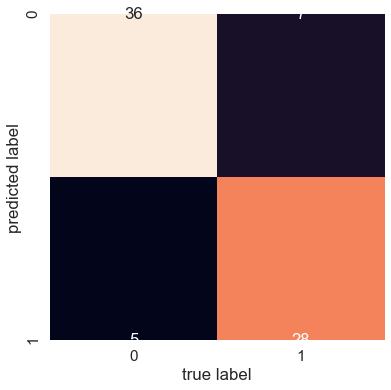

In [27]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_mat,
            square=False,
            annot=True,
            fmt='g',
            cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

You can also plot a confusion matrix using the function in scikit-learn's documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Confusion matrix, without normalization


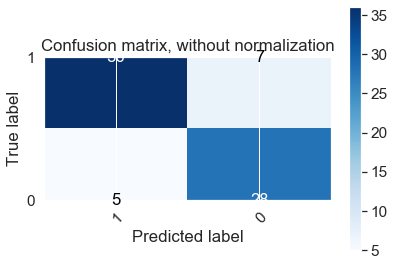

In [36]:
# Plotting a confusion matrix with sklearn
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Call the function
plot_confusion_matrix(y_test, 
                      y_preds, 
                      classes=heart_disease["target"].unique());

## 2. Getting the data ready

* Splitting data into X and y (features and targets)
* `train_test_split()`
* Splitting time series data (beware of validation sets)

Two things to remember:
    * Making sure it's all numerical
        * How to encode something? (`one_hot...`)
        * Turn car_sales into a larger dataset with missing and categorical values
    * Making sure there are no missing values

In [45]:
# Splitting the data into X & y
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [47]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [49]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2) # you can change the test size

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [53]:
# 80% of data is being used for the test set 
X.shape[0] * 0.8

242.4

In [ ]:
# Make sure it's all numerical
# One-hot encoding categories (or another method of encoding)

In [ ]:
# Make sure there are no missing values
# Filling the variables up with the mean (there are other ways to do
# this and it's a hard challenge, filling data where there isn't any?)

## 3. Choosing the right estimator/algorithm for your problem

* Classification problem
* Regression problem

### Can use the Boston housing dataset for an example regression problem

In [43]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [44]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
